In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
from keras.models import Sequential

In [8]:
train_dataSource = tf.keras.utils.image_dataset_from_directory(
    './train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300,300)
)

Found 1633 files belonging to 8 classes.
Using 1307 files for training.


In [9]:
class_names=train_dataSource.class_names
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


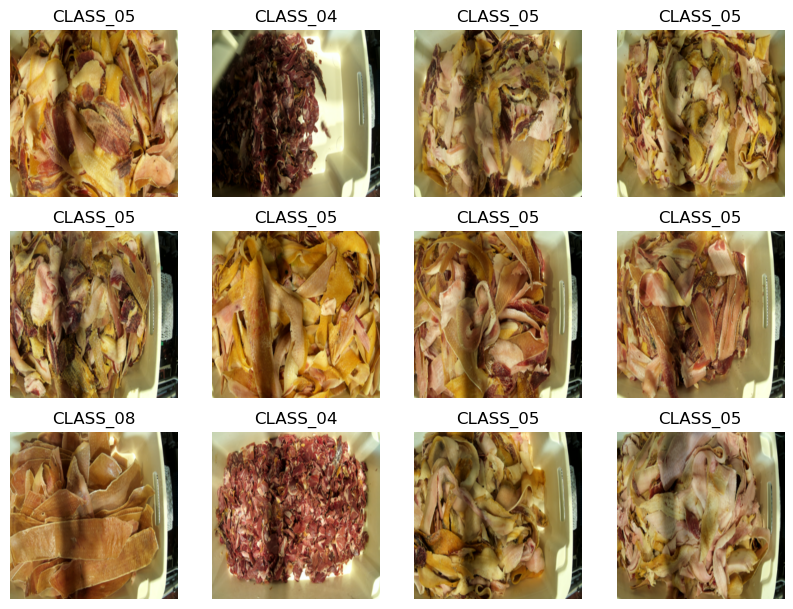

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_dataSource.take(1):
  for i in range(12):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [15]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.convolutional.conv2d_transpose import Conv2D
num_clases=len(class_names)

model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255,input_shape=(300,300,3)),
    tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_clases)
])

In [16]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [17]:
epochs=10
history=modelo.fit(
    train_dataSource,
    epochs=epochs
)

Epoch 1/10
41/41 [==============================] - 21s 489ms/step - loss: 1.6629 - accuracy: 0.5516
Epoch 2/10
41/41 [==============================] - 20s 480ms/step - loss: 0.6787 - accuracy: 0.7651
Epoch 3/10
41/41 [==============================] - 20s 487ms/step - loss: 0.4626 - accuracy: 0.8370
Epoch 4/10
41/41 [==============================] - 20s 486ms/step - loss: 0.2188 - accuracy: 0.9273
Epoch 5/10
41/41 [==============================] - 20s 491ms/step - loss: 0.0945 - accuracy: 0.9725
Epoch 6/10
41/41 [==============================] - 21s 512ms/step - loss: 0.0678 - accuracy: 0.9763
Epoch 7/10
41/41 [==============================] - 24s 583ms/step - loss: 0.0331 - accuracy: 0.9908
Epoch 8/10
41/41 [==============================] - 22s 517ms/step - loss: 0.0167 - accuracy: 0.9969
Epoch 9/10
41/41 [==============================] - 23s 559ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 10/10
41/41 [==============================] - 21s 521ms/step - loss: 0.0014 - accura

In [18]:
test_dataSource=tf.keras.utils.image_dataset_from_directory(
    './test',
    seed=123,
    image_size=(300,300)
)

Found 811 files belonging to 8 classes.


In [19]:
modelo.evaluate(test_dataSource,return_dict=True)
modelo.save("modelo-categoria-carnes.h5py")

26/26 [==============================] - 3s 112ms/step - loss: 0.6301 - accuracy: 0.8755


INFO:tensorflow:Assets written to: modelo-categoria-carnes.h5py\assets


INFO:tensorflow:Assets written to: modelo-categoria-carnes.h5py\assets


In [28]:
image_path='05-CAPTURE_20220421_053420_484.png'
image=tf.keras.preprocessing.image.load_img(image_path).resize((300,300))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
predicciones=modelo.predict(input_arr)


1/1 [==============================] - 0s 27ms/step


In [29]:
score=tf.nn.softmax(predicciones[0])
print(
    "Esta imagen parece ser {} con un {:.2f} % de exactitud."
    .format(class_names[np.argmax(score)],100*np.max(score))
)

Esta imagen parece ser CLASS_04 con un 100.00 % de exactitud.


In [20]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 6.1 MB/s eta 0:00:00


Found 811 images belonging to 8 classes.


C:\Users\User\AppData\Local\Temp\ipykernel_36180\1324946830.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicciones=custom_Model.predict_generator(generator=test_generator)


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.7500    0.0612    0.1132        49
           2     0.8163    0.8247    0.8205        97
           3     0.4773    0.9333    0.6316        45
           4     0.9417    0.9499    0.9458       459
           5     1.0000    0.7895    0.8824        19
           6     0.7538    0.8596    0.8033       114
           7     0.7692    0.3704    0.5000        27

    accuracy                         0.8434       811
   macro avg     0.6885    0.5986    0.5871       811
weighted avg     0.8574    0.8434    0.8255       811



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


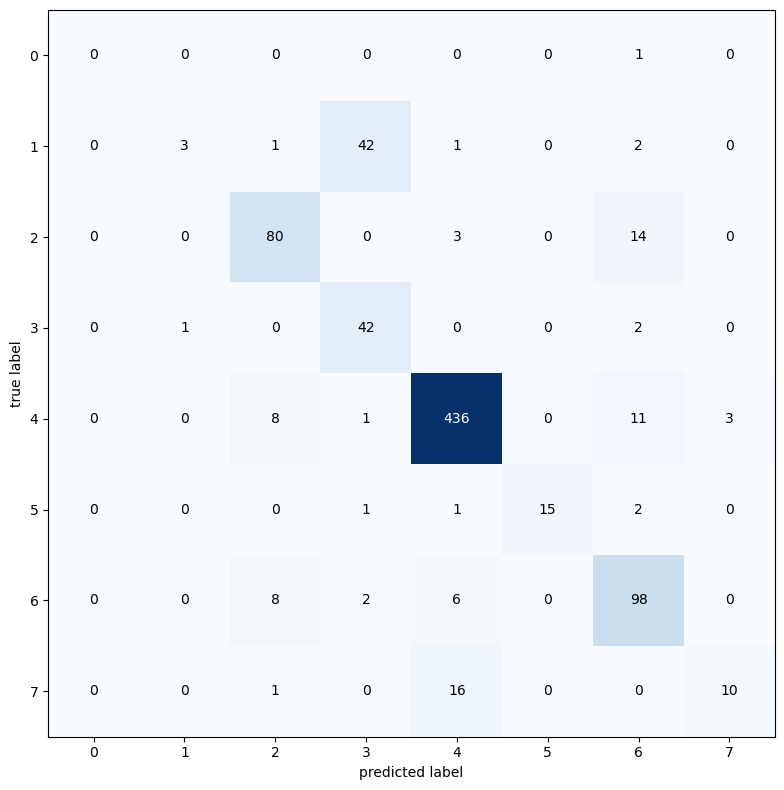

In [30]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

width_shape=300
height_shape=300

names=['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05','CLASS_06','CLASS_07','CLASS_08']
test_data_dir = './test'

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape,height_shape),
    class_mode='categorical',
    shuffle=False)

custom_Model=load_model("modelo-categoria-carnes.h5py")
#custom_Model=modelo
predicciones=custom_Model.predict_generator(generator=test_generator)

y_pred=np.argmax(predicciones,axis=1)
y_real=test_generator.classes

matc=confusion_matrix(y_real,y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8),show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred,digits=4))

